## Ensembling Approaches on Heart Diseases Dataset
- Dataset
    - Heart Disease Dataset
    - link: https://www.kaggle.com/datasets/krishujeniya/heart-diseae

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# ensemble models that combines multiple classifiers to
# improve prediction accuracy (VotingClassifier)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# a simple and widely used
# linear classifier, commonly used as a baseline in classification tasks.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from graphviz import Digraph

# Dataset Preperation

In [2]:
df = pd.read_csv('/content/heart_disease.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

### Basic information about the dataset

In [7]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())


Dataset Shape: (303, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [9]:
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# EDA

In [11]:
# Calculate correlations
correlations = df.corr()
print("\nCorrelation with Target:")
print(correlations['target'].sort_values(ascending=False))


Correlation with Target:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


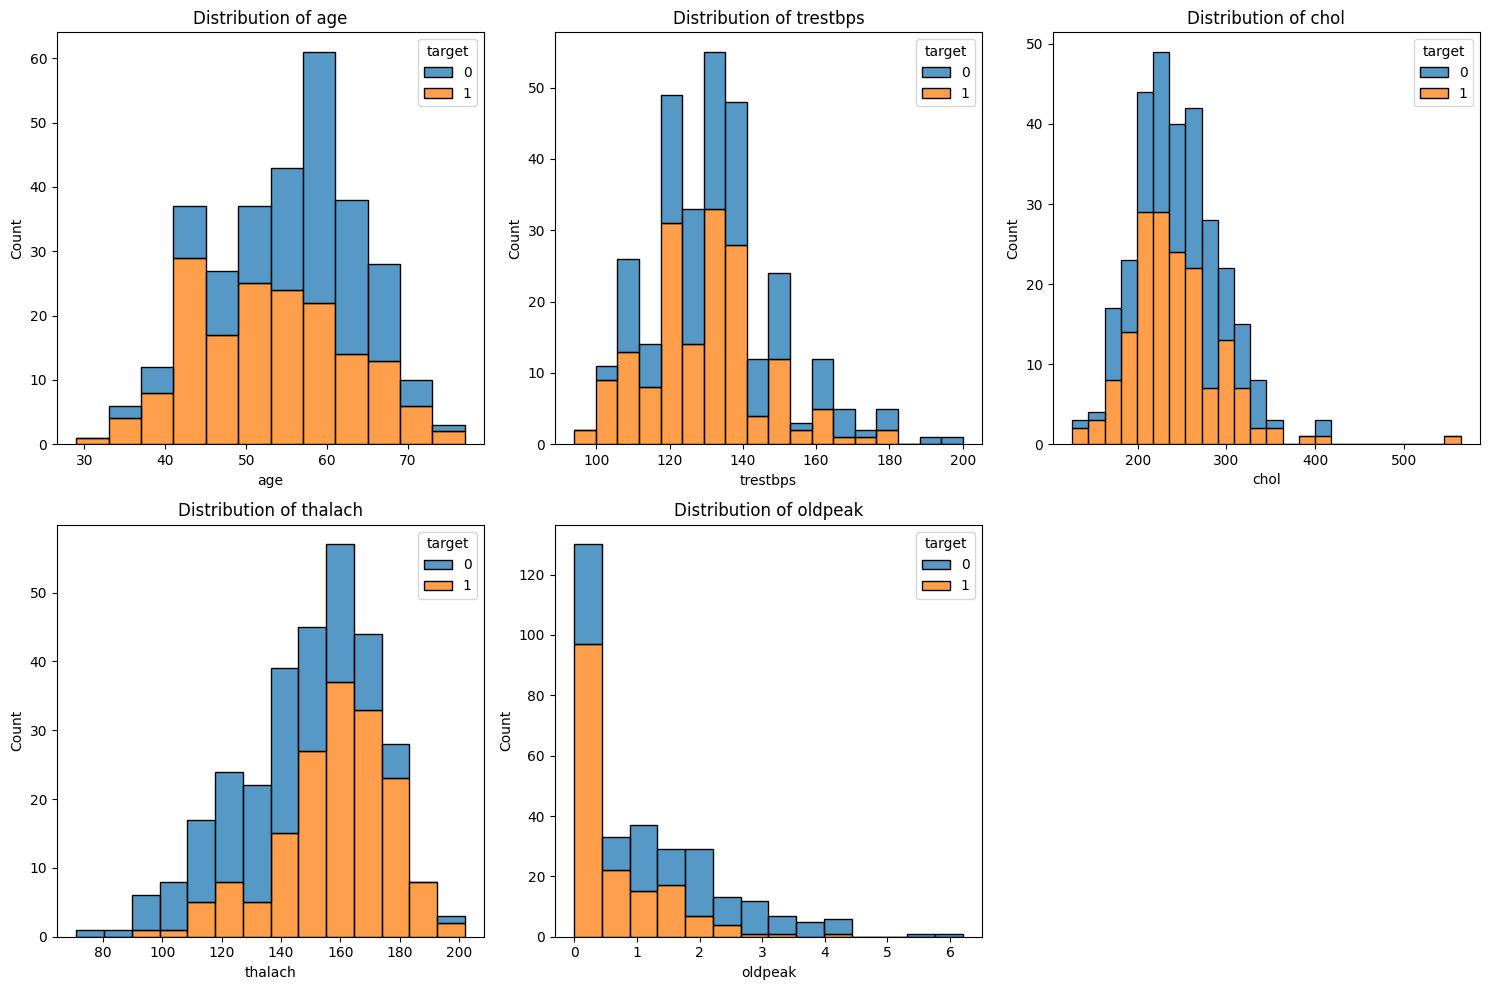

In [13]:
# Create distribution plots for numerical variables
plt.figure(figsize=(15, 10))
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue='target', multiple="stack")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

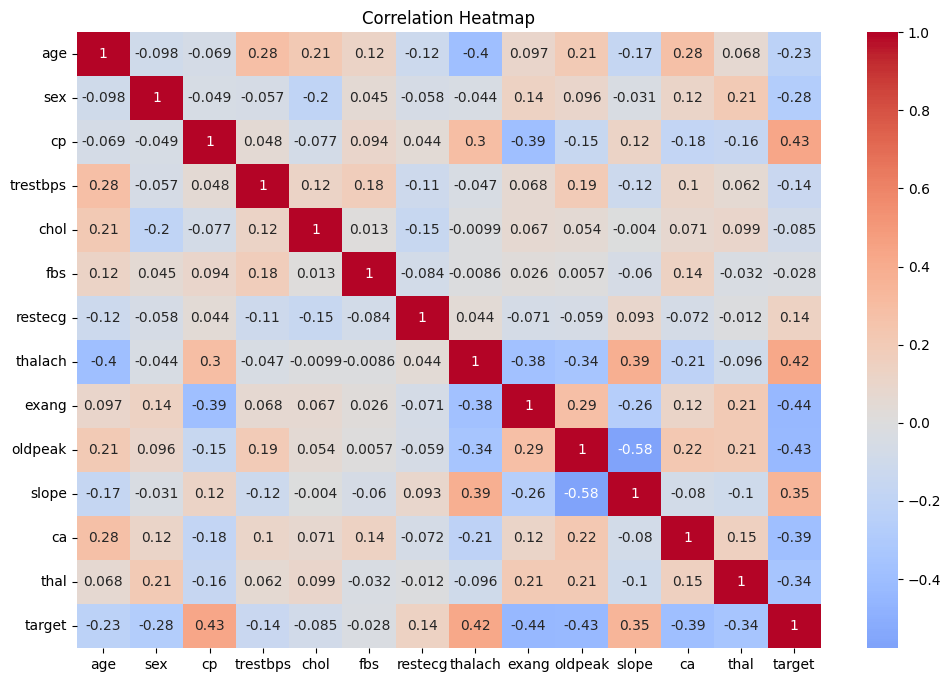

In [14]:
# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

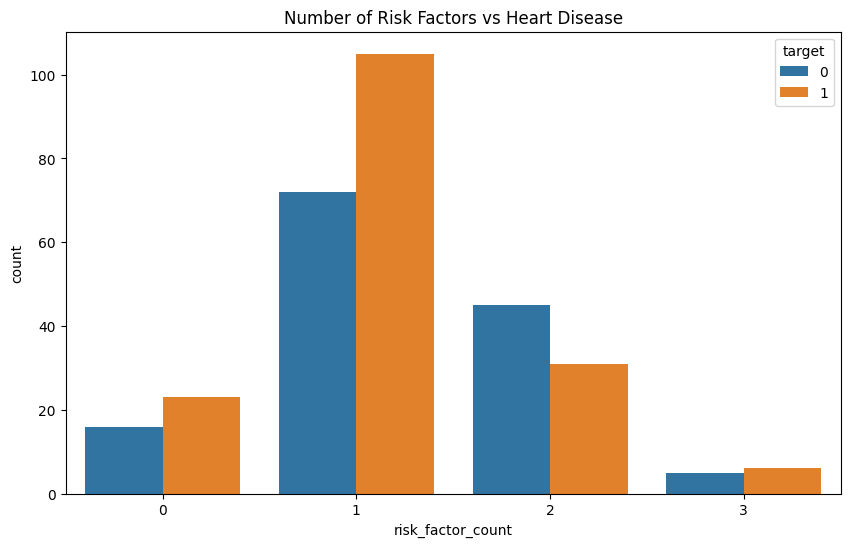

In [17]:
# Calculate risk factors
def calculate_risk_factors(df):
    risk_factors = []

    # High blood pressure (systolic > 140)
    if df['trestbps'] > 140:
        risk_factors.append('High BP')

    # High cholesterol (> 200)
    if df['chol'] > 200:
        risk_factors.append('High Cholesterol')

    # High fasting blood sugar
    if df['fbs'] == 1:
        risk_factors.append('High FBS')

    return len(risk_factors)

df['risk_factor_count'] = df.apply(calculate_risk_factors, axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='risk_factor_count', hue='target')
plt.title('Number of Risk Factors vs Heart Disease')
plt.show()

In [19]:
# Summary statistics by target
print("\nSummary Statistics by Heart Disease Status:")
print(df.groupby('target').agg({
    'age': ['mean', 'std'],
    'trestbps': ['mean', 'std'],
    'chol': ['mean', 'std'],
    'thalach': ['mean', 'std']
}).round(2))


Summary Statistics by Heart Disease Status:
         age       trestbps           chol        thalach       
        mean   std     mean    std    mean    std    mean    std
target                                                          
0       56.6  7.96    134.4  18.73  251.09  49.45  139.10  22.60
1       52.5  9.55    129.3  16.17  242.23  53.55  158.47  19.17


## Separate Attributes and Label

In [20]:
X = df.drop(['target'], axis=1)
print(f"attributes:\n {X}\n\n")

y = df['target']
print(f"label:\n {y}")

attributes:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  risk_factor_count  
0        0   0     1            

## Preprocessing

In [21]:
# select numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# standard scaling for numerical features
# will adjust the data so that each feature has
# a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(X[numerical_features])

# convert scaled data back to dataframe
final_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features)

# store preprocessed features in data_X for modeling
data_X = final_df.copy()

# verify the resulting data
print(data_X.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  \
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873   
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922   
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922   
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922   
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922   

   risk_factor_count  
0           2.587337  
1          -0.279073  
2          -0.279073  
3          -0.279073  
4          -0.279073  


## Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    data_X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# Training

## Bagging Approach: Random Forest

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# training
rf_model.fit(X_train, y_train)
# making predictions
rf_pred = rf_model.predict(X_test)

# evaluating
print("random forest accuracy:", accuracy_score(y_test, rf_pred))

random forest accuracy: 0.8360655737704918


In [26]:
def train_and_evaluate_rf_model(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Train the model
    print("Training the Random Forest model...")
    rf_model.fit(X_train, y_train)

    # Make predictions
    print("Making predictions on the test set...")
    rf_predictions = rf_model.predict(X_test)

    # Evaluate the model
    print("\n--- Random Forest Model Evaluation ---")
    accuracy = accuracy_score(y_test, rf_predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, rf_predictions))

# Call the function
train_and_evaluate_rf_model(X_train, y_train, X_test, y_test)


Training the Random Forest model...
Making predictions on the test set...

--- Random Forest Model Evaluation ---
Accuracy: 0.8361

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



## Boosting Approach: Gradient Boosting

In [24]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("gradient boosting accuracy:", accuracy_score(y_test, gb_pred))

gradient boosting accuracy: 0.819672131147541


In [27]:
def train_and_evaluate_gb_model(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):

    # Initialize the Gradient Boosting model
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state)

    # Train the model
    print("Training the Gradient Boosting model...")
    gb_model.fit(X_train, y_train)

    # Make predictions
    print("Making predictions on the test set...")
    gb_predictions = gb_model.predict(X_test)

    # Evaluate the model
    print("\n--- Gradient Boosting Model Evaluation ---")
    accuracy = accuracy_score(y_test, gb_predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, gb_predictions))

# Call the function
train_and_evaluate_gb_model(X_train, y_train, X_test, y_test)


Training the Gradient Boosting model...
Making predictions on the test set...

--- Gradient Boosting Model Evaluation ---
Accuracy: 0.8197

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



## Stacking Approach
- Use a meta-classifier (e.g., Logistic Regression) on top of base learners

In [39]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [43]:
!pip install --upgrade lightgbm scikit-learn

In [44]:
import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Assuming X_train, y_train, X_test, and y_test are already defined
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

[LightGBM] [Info] Number of positive: 132, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[


##  Voting Approach: Combine Multiple Classifiers

In [45]:
vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)

vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))

Voting Classifier Accuracy: 0.819672131147541


# Evaluation
- Compare the performance of all models.


In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stacking_pred))
print("Voting Classifier:", accuracy_score(y_test, vote_pred))

Random Forest: 0.8360655737704918
Gradient Boosting: 0.819672131147541
Stacking Model: 0.8032786885245902
Voting Classifier: 0.819672131147541


## Cross-Validation Performance Comparison

In [48]:
# define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# perform cross-validation and store results
results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, data_X, y, cv=2, scoring='accuracy')
    results[model_name] = scores

    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.8415 ± 0.0335
Gradient Boosting Cross-Validation Accuracy: 0.8349 ± 0.0401
Stacking Cross-Validation Accuracy: 0.8349 ± 0.0203
Voting Cross-Validation Accuracy: 0.8415 ± 0.0269


##  Visualizing Cross-Validation Results

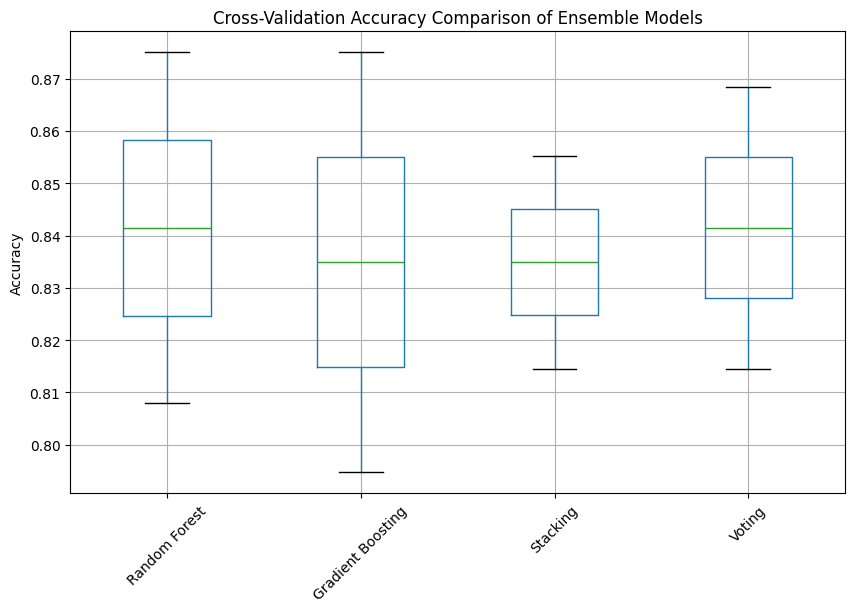

In [49]:
# this allows for easier manipulation and visualization.
results_df = pd.DataFrame(results)

# plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

## Confusion Matrix for Each Model

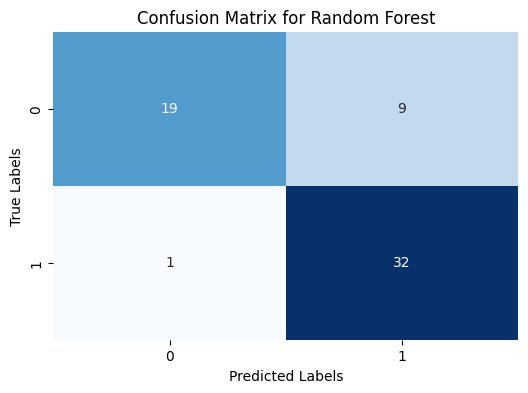

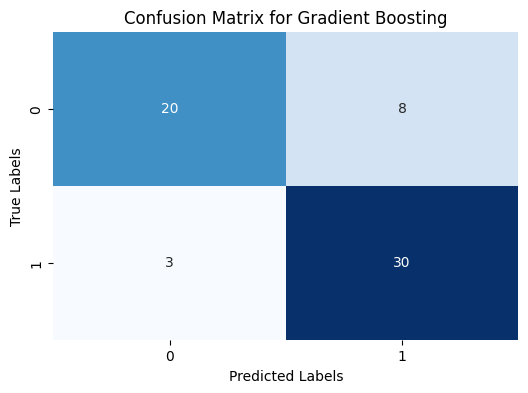

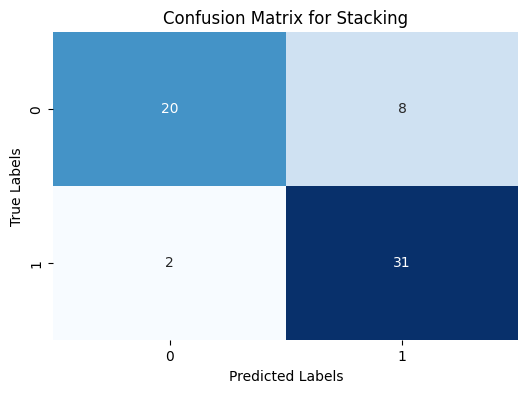

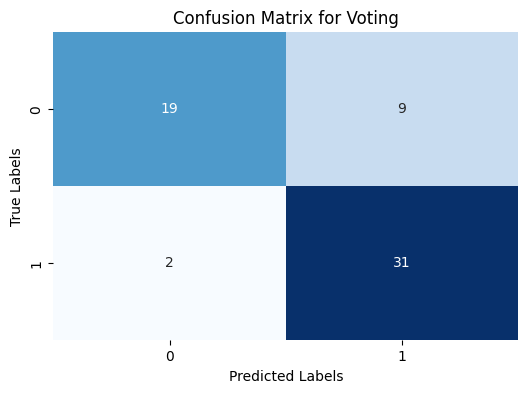

In [52]:
# fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

## Precision and Recall for Each Model

In [53]:
# fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")

Random Forest Performance Metrics:
 - Precision: 0.8583
 - Recall: 0.8361
 - F1 Score: 0.8313

Gradient Boosting Performance Metrics:
 - Precision: 0.8262
 - Recall: 0.8197
 - F1 Score: 0.8172

Stacking Performance Metrics:
 - Precision: 0.8473
 - Recall: 0.8361
 - F1 Score: 0.8331

Voting Performance Metrics:
 - Precision: 0.8346
 - Recall: 0.8197
 - F1 Score: 0.8154



# Explainable AI (XAI)

In [58]:
import shap

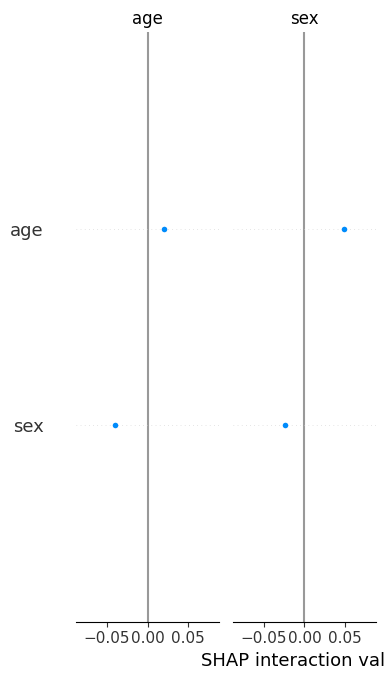

In [61]:
# Assuming models is defined as follows:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Stacking': LGBMClassifier(n_estimators=100, random_state=42),
    'Vooting': XGBClassifier(n_estimators=100, random_state=42)
}

# Fit the RandomForest model on the training data
models['RandomForest'].fit(X_train, y_train)

# Sample a subset of X_test
X_sample = X_test.sample(random_state=42)

# Initialize SHAP explainer for the RandomForest model
explainer = shap.TreeExplainer(models["RandomForest"])

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample)

# Optionally, display SHAP values (example)
shap.summary_plot(shap_values, X_sample)

## **illustrates the feature importance in terms of the average impact each feature has on the model's predictions**

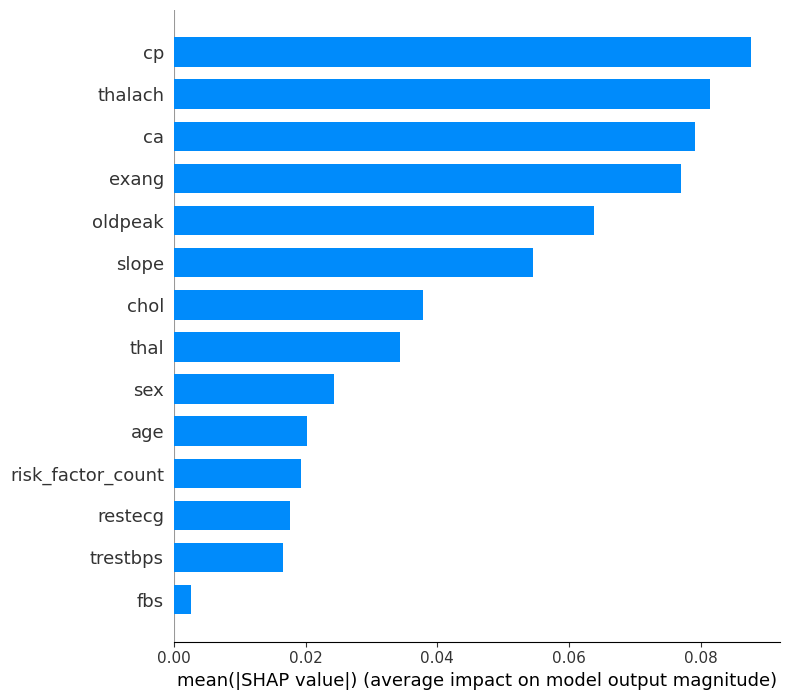

In [62]:
# calculate mean absolute SHAP values across all classes for each feature
mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)
mean_shap_values = np.mean(mean_shap_values, axis=1)

# repeat this vector to create a matrix that matches X_sample's shape
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))

# plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)

## Explaining Model Predictions Using LIME

In [63]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=23eb869c36dd2e0d5188cae58e760f2eac8a2daa2915faf03321b83b25edbc51
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [64]:
from lime.lime_tabular import LimeTabularExplainer

In [66]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Stacking': LGBMClassifier(n_estimators=100, random_state=42),
    'Vooting': XGBClassifier(n_estimators=100, random_state=42)
}

# Ensure the RandomForest model is fitted
models['RandomForest'].fit(X_train, y_train)

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=[str(cls) for cls in y_train.unique()], mode='classification')

# Choose a sample from the test set to explain
sample_index = 0

# Generate the explanation
exp = lime_explainer.explain_instance(X_test.values[sample_index], models["RandomForest"].predict_proba, num_features=10)
print(X_test.values[sample_index])

# Display the explanation
exp.show_in_notebook()
exp.show_in_notebook(show_table=True, show_all=False)

[ 0.29046364  0.68100522 -0.93851463  1.04952029  0.57466203 -0.41763453
 -1.00583187 -1.6463164   1.43548113 -0.37924438 -0.64911323  0.26508221
 -2.14887271  1.15413204]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
# Assuming models is defined as follows and the RandomForest model is already fitted
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'LGBM': LGBMClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}

# Ensure the RandomForest model is fitted
models['RandomForest'].fit(X_train, y_train)

# Choose a valid sample index (replace with a valid index, or use np.random.randint(0, len(X_test)))
sample_index = 6

# Ensure feature_names and class_names are valid strings
feature_names = X_train.columns.tolist()

# Ensure that class names in LIME are ordered the same way as the model output
class_names = [str(cls) for cls in sorted(y_train.unique())]

# Initialize the LIME explainer with the corrected class names
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Generate the explanation again
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],
    models["RandomForest"].predict_proba,
    num_features=10
)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)

print("\n\nFeature values of the selected sample:")
print(X_test.values[sample_index])

# Get the actual class of the selected sample
actual_class = y_test.values[sample_index]
print(f"Actual class: {actual_class}")

# Get the predicted class of the selected sample
predicted_class = models["RandomForest"].predict(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted class: {predicted_class}")

# Get the predicted probabilities of the selected sample
predicted_probabilities = models["RandomForest"].predict_proba(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted probabilities: {predicted_probabilities}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Feature values of the selected sample:
[ 0.18017482  0.68100522  0.03203122 -0.66386682 -0.12105533 -0.41763453
  0.89896224  0.84632238 -0.69663055 -0.89686172 -2.27457861 -0.71442887
 -0.51292188 -0.27907291]
Actual class: 1
Predicted class: 1
Predicted probabilities: [0.09 0.91]
